In [1]:
import tensorflow as tf
tf.__version__

'1.15.3'

In [2]:
dataset = tf.keras.datasets.mnist # 28x28 image (hand written) 0-9
(X_train, y_train), (X_test, y_test) = dataset.load_data()

(28, 28)


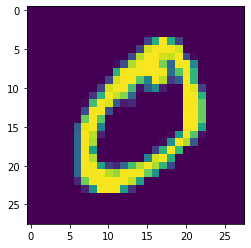

In [6]:
import matplotlib.pyplot as plt
print(X_train[0].shape)
plt.imshow(X_train[1])
# print(X_train[0])

In [8]:
# normalize
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [9]:
# Algorithm
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer di flat 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Hiden layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Hiden layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer

In [10]:
# fit
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2596 - acc: 0.9249
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1063 - acc: 0.9679
Epoch 3/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0718 - acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0539 - acc: 0.9826
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0404 - acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0303 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0256 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0209 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss

In [11]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.1163 - acc: 0.9771
0.116285083785791 0.9771


In [ ]:
# model.save("model_tf_hand_writting")

In [12]:
new_model = tf.keras.models.load_model("model_tf_hand_writting")

In [14]:
predictions = new_model.predict(X_test)

In [15]:
import numpy as np
print(np.argmax(predictions[0]))

7


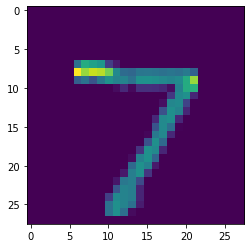

In [16]:
plt.imshow(X_test[0])

In [ ]:
# from tkinter import *
# import tkinter as tk
# import win32gui
# from PIL import ImageGrab, Image
# import numpy as np
# model = tf.keras.models.load_model('model_tf_hand_writting')
# def predict_digit(img):
#     #resize image to 28x28 pixels
#     img = img.resize((28,28))
#     #convert rgb to grayscale
#     img = img.convert('L')
#     img = np.array(img)
#     #reshaping to support our model input and normalizing
#     img = img.reshape(1,28,28,1)
#     img = img/255.0
#     #predicting the class
#     res = model.predict([img])[0]
#     return np.argmax(res), max(res)
# class App(tk.Tk):
#     def __init__(self):
#         tk.Tk.__init__(self)
#         self.x = self.y = 0
#         # Creating elements
#         self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
#         self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
#         self.classify_btn = tk.Button(self, text = "Recognise", command =  self.classify_handwriting) 
#         self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
#         # Grid structure
#         self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
#         self.label.grid(row=0, column=1,pady=2, padx=2)
#         self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
#         self.button_clear.grid(row=1, column=0, pady=2)
#         #self.canvas.bind("<Motion>", self.start_pos)
#         self.canvas.bind("<B1-Motion>", self.draw_lines)
#     def clear_all(self):
#         self.canvas.delete("all")
#     def classify_handwriting(self):
#         HWND = self.canvas.winfo_id() # get the handle of the canvas
#         rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
#         im = ImageGrab.grab(rect)
#         digit, acc = predict_digit(im)
#         self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
#     def draw_lines(self, event):
#         self.x = event.x
#         self.y = event.y
#         r=8
#         self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
# app = App()
# mainloop()